# 0. 라이브러리 불러오기



In [29]:
# 기본적 modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

###
plt.rc('font', family='NanumBarunGothic')

# plt.rcParams['font.family'] ='Malgun Gothic'
import seaborn as sns
from IPython.display import Image

# 분석 modules
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from scipy.stats.mstats import winsorize

# 머신러닝 modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier


# warnings 무시
import warnings
warnings.filterwarnings('ignore')

# 0. 팀소개

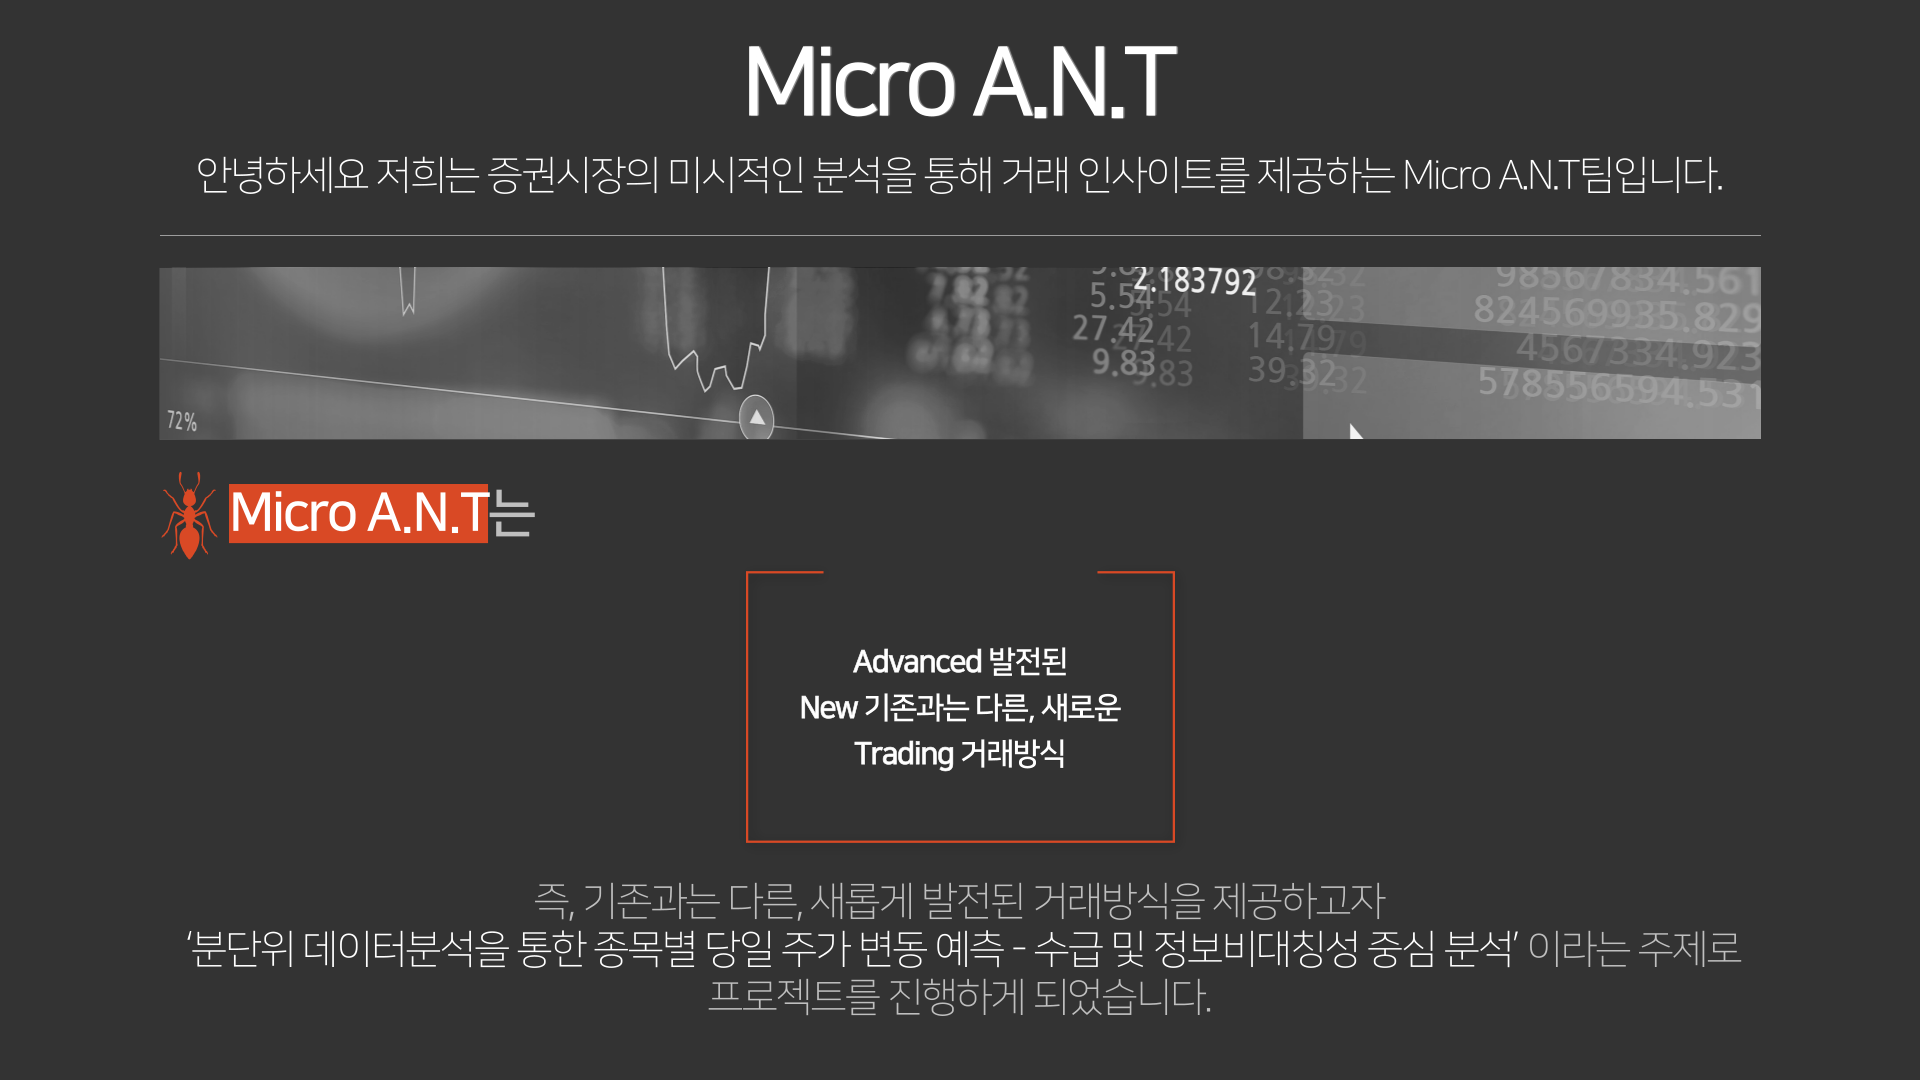

In [ ]:
Image('팀명.png')

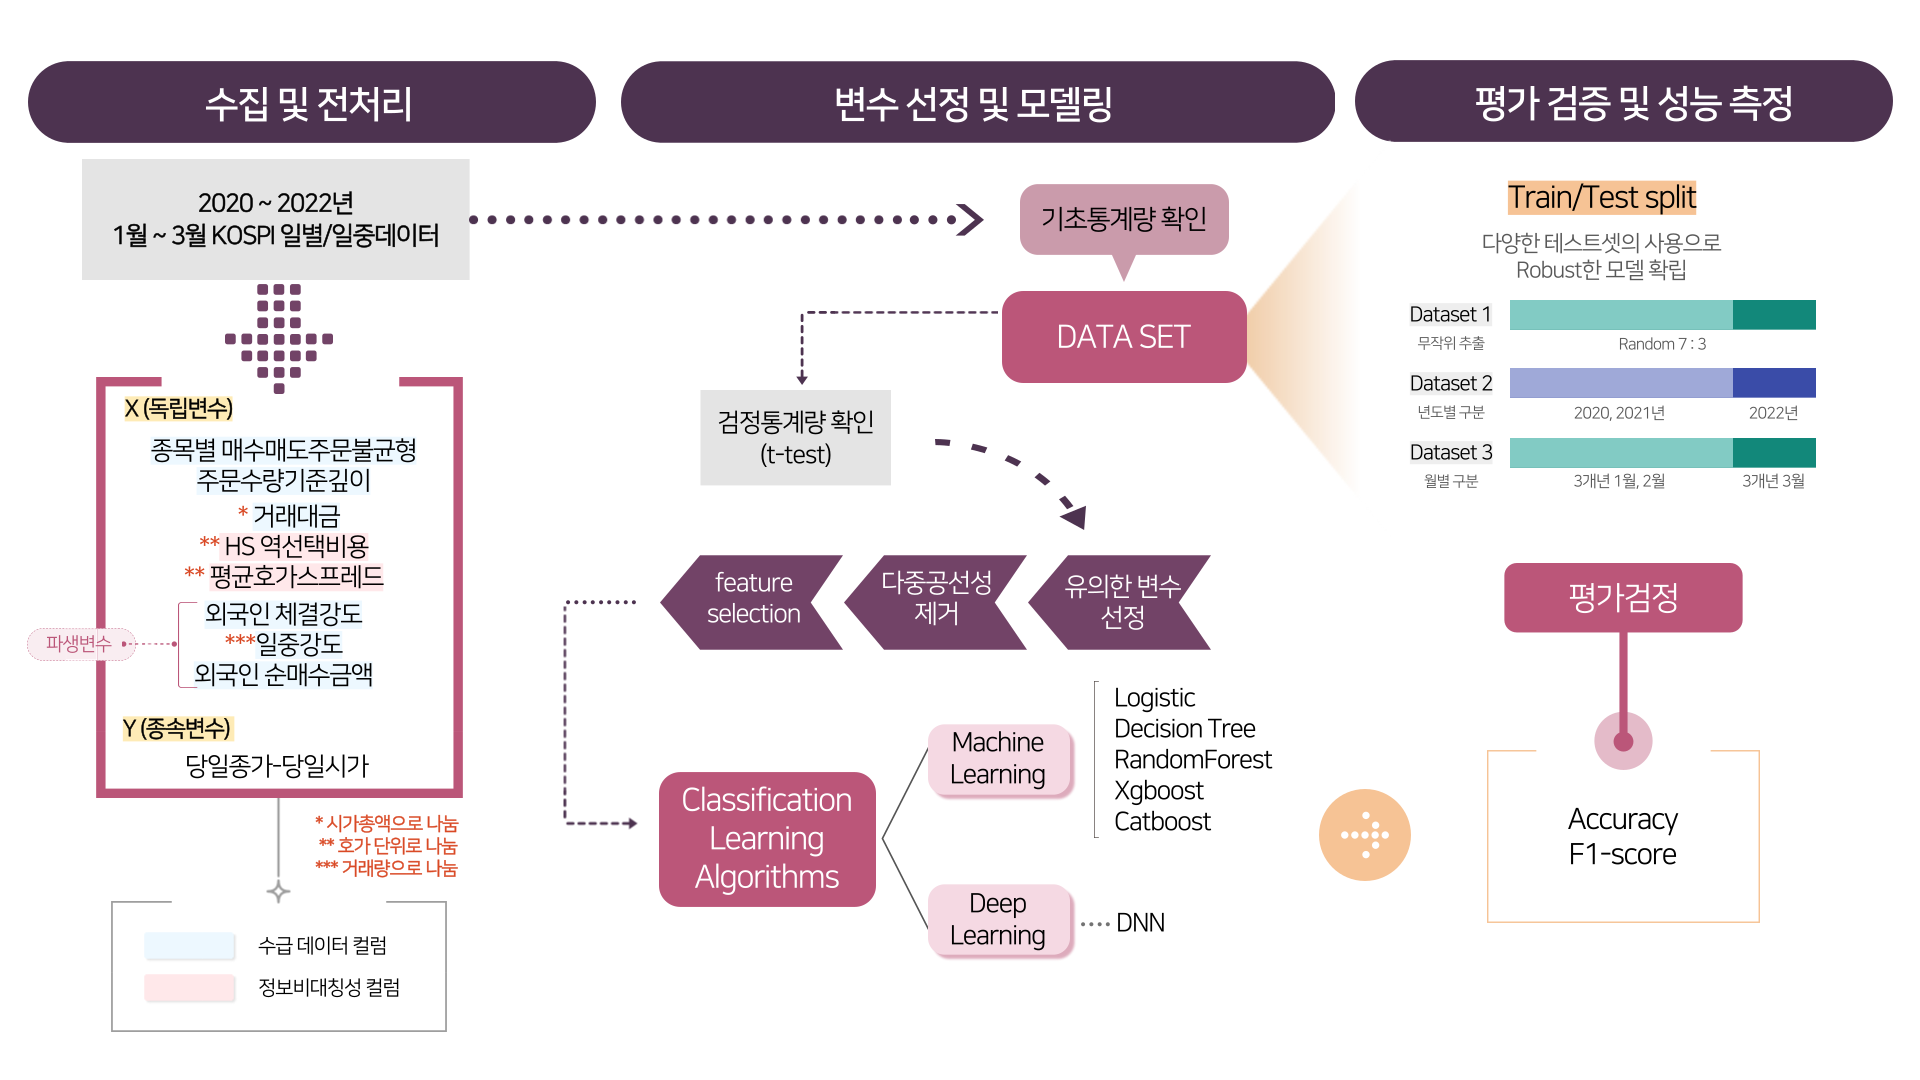

In [ ]:
Image('flowchart2.png')

# 1. 데이터

KRX의 자료를 최대한 활용하고자 **'주식' 파일에 있는 일별 / 일중 / 투자자별 3가지 데이터를 모두 사용**하였습니다. 해당 데이터 중 필요한 컬럼들을 추출한 뒤, '외국인체결강도' , '일중강도' , '외국인순매수' 와 같은 **파생변수**들을 새로이 생성하였습니다.

In [ ]:
import os

#경로 지정해주기
path1 = './일별/' 

path2_1 = './일중/2020/'
path2_2 = './일중/2021/'
path2_3 = './일중/2022/'

path3_1 = './투자자별/2020/'
path3_2 = './투자자별/2021/'
path3_3 = './투자자별/2022/'

#파일 리스트 저장하기
file_list1 = os.listdir(path1)  # 일별데이터 불러와서 저장

file_list2_1 = os.listdir(path2_1) # 2020년도 일중데이터
file_list2_2 = os.listdir(path2_2) # 2021년도 일중데이터
file_list2_3 = os.listdir(path2_3) # 2022년도 일중데이터

file_list3_1 = os.listdir(path3_1) # 2020년도 투자자별 일중데이터
file_list3_2 = os.listdir(path3_2) # 2021년도 투자자별 일중데이터
file_list3_3 = os.listdir(path3_3) # 2022년도 투자자별 일중데이터

file_list_py1 = [file for file in file_list1 if file.endswith('.csv')]

file_list_py2_1 = [file for file in file_list2_1 if file.endswith('.csv')]
file_list_py2_2 = [file for file in file_list2_2 if file.endswith('.csv')]
file_list_py2_3 = [file for file in file_list2_3 if file.endswith('.csv')]

file_list_py3_1 = [file for file in file_list3_1 if file.endswith('.csv')]
file_list_py3_2 = [file for file in file_list3_2 if file.endswith('.csv')]
file_list_py3_3 = [file for file in file_list3_3 if file.endswith('.csv')]

일별데이터 = pd.DataFrame() #일별 데이터 데이터프레임

일중데이터_2020 = pd.DataFrame() # 2020 일증 데이터 데이터프레임
일중데이터_2021 = pd.DataFrame() # 2021 일중 데이터 데이터프레임
일중데이터_2022 = pd.DataFrame() # 2022 일중 데이터 데이터프레임

투자자데이터_2020 = pd.DataFrame() # 2020 일증 데이터 데이터프레임
투자자데이터_2021 = pd.DataFrame() # 2021 일증 데이터 데이터프레임
투자자데이터_2022 = pd.DataFrame() # 2022 일증 데이터 데이터프레임


## 1.1 일별데이터 load

In [ ]:
#일별csv
for i in file_list_py1:
    data1 = pd.read_csv(path1 + i,encoding='cp949')
    일별데이터 = pd.concat([일별데이터,data1])


## 1.2 일중데이터 load

### 1.2.1 2020년 일중데이터

In [ ]:
#일중csv
for i in file_list_py2_1: # 2020년도 일중데이터
    data2_1 = pd.read_csv(path2_1 + i,encoding='cp949',usecols=[0, 1, 3, 4, 5, 6, 7, 8, 10, 24, 27, 31, 32])
    일중데이터_2020 = pd.concat([일중데이터_2020,data2_1])

### 1.2.2 2021년 일중데이터

In [ ]:
for i in file_list_py2_2: # 2021년도 일중데이터
    data2_2 = pd.read_csv(path2_2 + i,encoding='cp949',usecols=[0, 1, 3, 4, 5, 6, 7, 8, 10, 24, 27, 31, 32])
    일중데이터_2021 = pd.concat([일중데이터_2021,data2_2])

### 1.2.3 2022년 일중데이터

In [ ]:
for i in file_list_py2_3: # 2022년도 일중데이터
    data2_3 = pd.read_csv(path2_3 + i,encoding='cp949',usecols=[0, 1, 3, 4, 5, 6, 7, 8, 10, 24, 27, 31, 32])
    일중데이터_2022 = pd.concat([일중데이터_2022,data2_3])

## 1.3 투자자별데이터 load

### 1.3.1 2020년 투자자별데이터

In [ ]:
#투자자별csv
for i in file_list_py3_1: # 2020년도 투자자별 데이터
    data3_1 = pd.read_csv(path3_1 + i,encoding='cp949')
    투자자데이터_2020 = pd.concat([투자자데이터_2020,data3_1])

### 1.3.2 2021년 투자자별데이터

In [ ]:
for i in file_list_py3_2: # 2021년도 투자자별 데이터
    data3_2 = pd.read_csv(path3_2 + i,encoding='cp949')
    투자자데이터_2021 = pd.concat([투자자데이터_2021,data3_2])

### 1.3.3 2022년 투자자별데이터

In [ ]:
for i in file_list_py3_3: # 2022년도 투자자별 데이터
    data3_3 = pd.read_csv(path3_3 + i,encoding='cp949')
    투자자데이터_2022 = pd.concat([투자자데이터_2022,data3_3])

In [ ]:
일별데이터.reset_index(drop = True,inplace=True) # 일별데이터 데이터프레임 인덱스 리셋

일중데이터_2020.reset_index(drop = True,inplace=True)  # 2020년도 일중데이터 데이터프레임 인덱스 리셋
일중데이터_2021.reset_index(drop = True,inplace=True) # 2021년도 일중데이터 데이터프레임 인덱스 리셋
일중데이터_2022.reset_index(drop = True,inplace=True) # 2022년도 일중데이터 데이터프레임 인덱스 리셋

투자자데이터_2020.reset_index(drop = True,inplace=True) # 2020년도 투자자별 데이터 데이터프레임 인덱스 리셋
투자자데이터_2021.reset_index(drop = True,inplace=True) # 2021년도 투자자별 데이터 데이터프레임 인덱스 리셋
투자자데이터_2022.reset_index(drop = True,inplace=True) # 2022년도 투자자별 데이터 데이터프레임 인덱스 리셋


## 1.4 거래시각 지정하기 (09:00-11:00)

**목표**: 시장 참여자들의 의사가 반영되어 양질의 정보를 담고있는 **장 초반의 수급 데이터에 주목**하여 장 후반까지의 흐름 예측

전일 미국 증시(09시), 당일 중국 증시 개장(10시 30분)등의 거시경제 움직임을 반영하기 위해 **9시부터 11시까지의 데이터**들로 설명변수를 구성

1.4.1 일중데이터 거래시각 추출

In [ ]:
일중데이터_2020 = 일중데이터_2020[(일중데이터_2020['거래시각']>=900) & (일중데이터_2020['거래시각']<=1100)]
일중데이터_2021 = 일중데이터_2021[(일중데이터_2021['거래시각']>=900) & (일중데이터_2021['거래시각']<=1100)]
일중데이터_2022 = 일중데이터_2022[(일중데이터_2022['거래시각']>=900) & (일중데이터_2022['거래시각']<=1100)]

list__=[]
for i in range(0,3):
        list__.append(globals()['일중데이터_202{}'.format(i)])

df_일중시세정보 = pd.concat(list__,ignore_index=True)
df_일중시세정보=df_일중시세정보[['거래일자','거래시각','종목코드','종목명','시가','고가','저가','종가','거래대금','종목별거래량기준매수매도불균형','평균호가스프레드','HS역선택비용','주문수량기준깊이']]

## 1.4.2 투자자 데이터 핸들링 

#### **거래시각 추출** 및 **'외국인' 투자자**에만 해당하는 데이터 추출

In [ ]:
외국인데이터_2020=투자자데이터_2020[투자자데이터_2020['투자자구분코드']==9000] #외국인 수급량만을 불러오기
외국인데이터_2020 = 외국인데이터_2020[(외국인데이터_2020['거래시각']>=900) & (외국인데이터_2020['거래시각']<=1100)] #거래시간 데이터

외국인데이터_2021=투자자데이터_2021[투자자데이터_2021['투자자구분코드']==9000] #외국인 수급량만을 불러오기
외국인데이터_2021 = 외국인데이터_2021[(투자자데이터_2021['거래시각']>=900) & (외국인데이터_2021['거래시각']<=1100)] #거래시간 데이터

외국인데이터_2022=투자자데이터_2022[투자자데이터_2022['투자자구분코드']==9000] #외국인 수급량만을 불러오기
외국인데이터_2022 = 외국인데이터_2022[(투자자데이터_2022['거래시각']>=900) & (외국인데이터_2022['거래시각']<=1100)] #거래시간 데이터

In [ ]:
list__=[]
for i in range(0,3):
        list__.append(globals()['외국인데이터_202{}'.format(i)])

In [ ]:
df_외국인데이터=pd.concat(list__,ignore_index=True)
df_외국인데이터=df_외국인데이터[['종목코드','종목명','거래일자','거래시각','매수거래대금','매도거래대금','매수거래량','매도거래량']]

In [ ]:
일별데이터.to_csv('df_일별시세정보.csv',encoding='cp949')
df_일중시세정보.to_csv('df_일중시세정보.csv',encoding='cp949')
df_외국인데이터.to_csv('df_외국인데이터.csv',encoding='cp949')

# 데이터 로드

In [4]:
df_일별시세정보=pd.read_csv('/content/drive/MyDrive/데이터셋/df_일별시세정보.csv',encoding='cp949')
df_일중시세정보=pd.read_csv('/content/drive/MyDrive/데이터셋/df_일중시세정보.csv',encoding='cp949')
df_외국인데이터=pd.read_csv('/content/drive/MyDrive/데이터셋/df_외국인데이터.csv',encoding='cp949')

# 2. 변수 추출

**설명변수로 사용할 데이터는 총 8가지**이며, 크게 2가지 특성으로 구분하였습니다. 구분한 특성은 다음과 같습니다.
- 수급관련 변수
- 정보비대칭성 변수

설명변수에 대한 컬럼명과 설명은 아래와 같습니다.

*(비고란에는 분석 시 유용하게 사용될 수 있도록 처리한 내용에 관한 설명을 담았습니다.)*

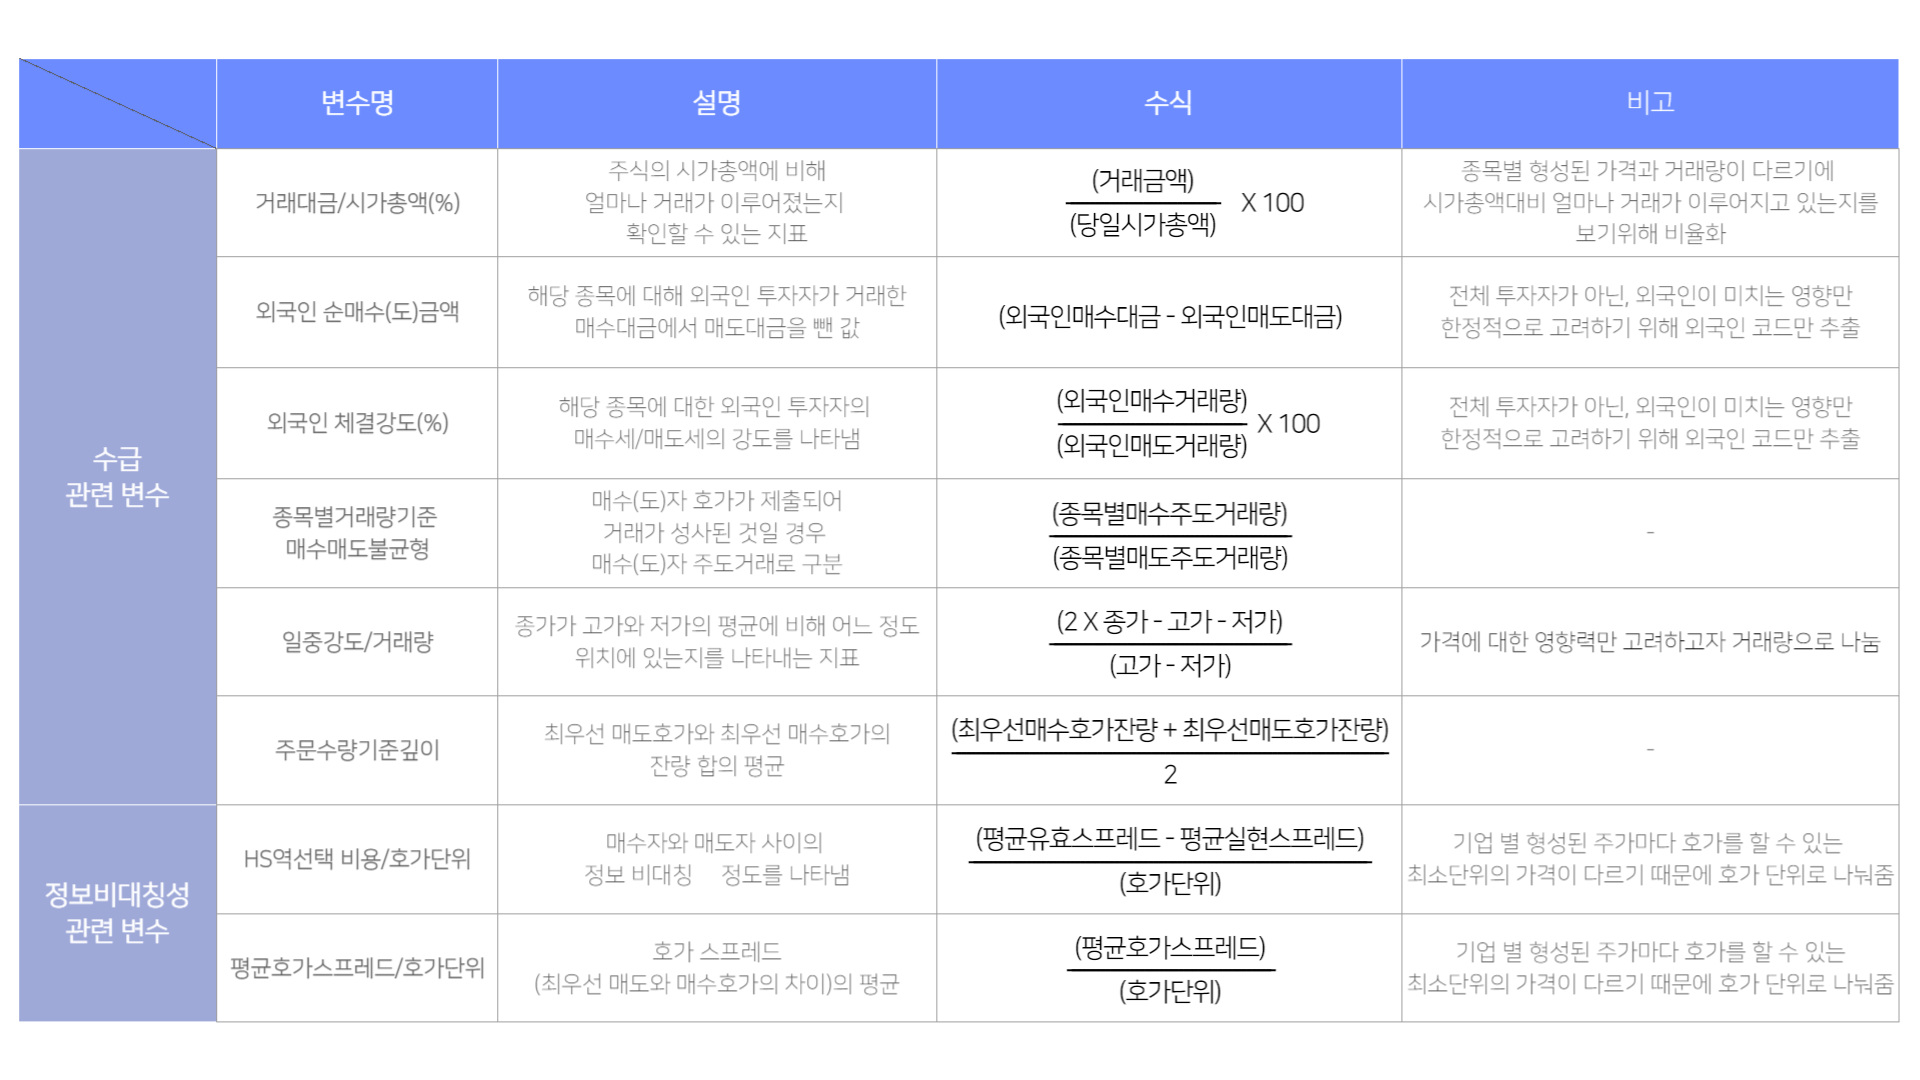

In [ ]:
Image('변수설명.png')

## 2.1. 수급 관련 변수

### 2.1.1 거래대금/시가총액(%)

- 주식의 시가총액에 비하여 얼마나 거래가 많이 이루어졌는지 나타내기에, 가격 변동성에 대한 정보를 제공
- 연구결과에 따르면 이 비율은 주가수익률과 음의 상관관계를 가져 해당 비율이 더 높은 주식일수록 낮은 주가수익률을 기록할 것으로 예상

In [7]:
df_시가총액=df_일별시세정보[['종목코드','거래일자','시가총액']]
df_일중시세정보=pd.merge(df_일중시세정보,df_시가총액,on=['종목코드','거래일자'],how='inner')
df_일중시세정보['거래대금/시가총액(%)'] = df_일중시세정보['거래대금'] / df_일중시세정보['시가총액']
df_거래대금시가총액=pd.DataFrame(df_일중시세정보[['종목코드','거래일자','거래대금/시가총액(%)']])
df_거래대금시가총액=np.round(df_거래대금시가총액.groupby(['종목코드','거래일자']).sum()*100,4)
df_거래대금시가총액.reset_index(inplace=True)

### 2.1.2 외국인 순매수(도)금액

- 유가증권 시장에서 외국인 투자자의 영향력을 고려했을 때, **외국인 투자자의 순매수 금액 크기는 가격 형성에 유의한 정보이므로** 투자자 중 '외국인' 투자자의 영향력만 추출

In [8]:
df_외국인순매수도금액=df_외국인데이터[['종목코드','종목명','거래일자','매수거래대금','매도거래대금']]
df_외국인순매수도금액['외국인순매수(도)금액']=df_외국인순매수도금액['매수거래대금']-df_외국인순매수도금액['매도거래대금']
df_외국인순매수도금액=df_외국인순매수도금액[['종목코드','종목명','거래일자','외국인순매수(도)금액']]
df_외국인순매수도금액=np.round(df_외국인순매수도금액.groupby(['종목코드','종목명','거래일자']).sum()/121,0)
df_외국인순매수도금액.reset_index(inplace=True,drop=False)

### 2.1.3 외국인 체결강도(%)

- 유가증권 시장에서 외국인 투자자의 영향력을 고려했을 때, 외국인 투자자의 체결강도 지표는 매매강세 정도 및 가격 흐름에 있어 유의하다고 판단

In [9]:
df_외국인거래실적_체결강도 = df_외국인데이터[['거래일자','종목명','종목코드','매도거래량','매수거래량']]
df_체결강도 = df_외국인거래실적_체결강도.groupby(['종목코드', '거래일자'])['매도거래량','매수거래량'].sum()
df_체결강도['외국인체결강도(%)'] = np.round(df_체결강도['매수거래량'] / df_체결강도['매도거래량'] * 100,4)
df_체결강도.reset_index(inplace=True,drop=False)
df_외국인체결강도=df_체결강도[['종목코드','거래일자','외국인체결강도(%)']]

### 2.1.4 종목별거래량기준매수매도불균형

- 거래량 기준으로 시장의 매매방향 확인 가능
- 매수(도)자 호가가 제출되어 거래가 성사된 것일 경우 매수(도)자주도거래로 구분

In [10]:
df_종목별거래량기준매수매도불균형=df_일중시세정보[['종목코드','거래일자','종목별거래량기준매수매도불균형']]
df_종목별거래량기준매수매도불균형=np.round(df_종목별거래량기준매수매도불균형.groupby(['종목코드','거래일자']).sum()/121,4)
df_종목별거래량기준매수매도불균형.reset_index(inplace=True)

### 2.1.5 일중강도/거래량

- 고가,저가,시가,종가 모두 고려하여 산출되므로 가격에 대한 정보와 당일의 변동성 대비 가격 방향(상승,하락) 에너지를 반영한 지표

In [12]:
df_일중강도_시각=df_일중시세정보[['종목코드','종목명','거래일자','거래시각']]
df_일중강도_종가=df_일중시세정보[['종목코드','종목명','거래일자','거래시각','종가']]
df_일중강도_시각.sort_values(['종목명','거래일자'],inplace=True)
df_일중강도_시각.reset_index(inplace=True,drop=True)
df_일중강도_시각.set_index(['종목코드','종목명','거래일자'],inplace=True,drop=True)
df_일중강도_시각=df_일중강도_시각.groupby(['종목코드','종목명','거래일자']).max()

df_일중강도_종가최종=pd.merge(df_일중강도_시각,df_일중강도_종가,on=['종목코드','종목명','거래일자','거래시각'],how='inner')

df_일중시세정보_고가=df_일중시세정보[['종목코드','거래일자','고가']]
df_일중시세정보_고가=df_일중시세정보_고가.groupby(['종목코드','거래일자']).max()
df_일중시세정보_고가.reset_index(inplace=True)

df_일중시세정보_저가=df_일중시세정보[['종목코드','거래일자','저가']]
df_일중시세정보_저가=df_일중시세정보_저가.groupby(['종목코드','거래일자']).min()
df_일중시세정보_저가.reset_index(inplace=True)

df_일중강도=pd.merge(df_일중강도_종가최종,df_일중시세정보_저가,on=['종목코드','거래일자'],how='inner')
df_일중강도=pd.merge(df_일중강도,df_일중시세정보_고가,on=['종목코드','거래일자'],how='inner')

df_일중강도['일중강도/거래량']=(2*df_일중강도['종가']-df_일중강도['고가']-df_일중강도['저가'])/(df_일중강도['고가']-df_일중강도['저가'])
df_일중강도=pd.DataFrame(df_일중강도[['종목코드','거래일자','일중강도/거래량']])

### 2.1.6 주문수량기준깊이

- 시장깊이는 많은 양의 매도, 매수 주문을 흡수할 수 있는 시장의 능력을 나타내는 지표로 주문 수량를 기준으로 유가 증권의 시장 유동성을 의미

In [13]:
df_주문수량기준깊이=df_일중시세정보[['종목코드','거래일자','주문수량기준깊이']]
df_주문수량기준깊이=np.round(df_주문수량기준깊이.groupby(['종목코드','거래일자']).sum()/121,4)
df_주문수량기준깊이.reset_index(inplace=True)

## 2.2. 정보비대칭성 관련 변수

### *호가단위
- **정보비대칭성 관련 컬럼 생성 시 계산식에서 활용하기 위해 생성한 컬럼**
- 'HS역선택 비용/호가단위',  '평균호가 스프레드/호가단위' 와 같이 활용될 예정

출처_한국거래소 홈페이지



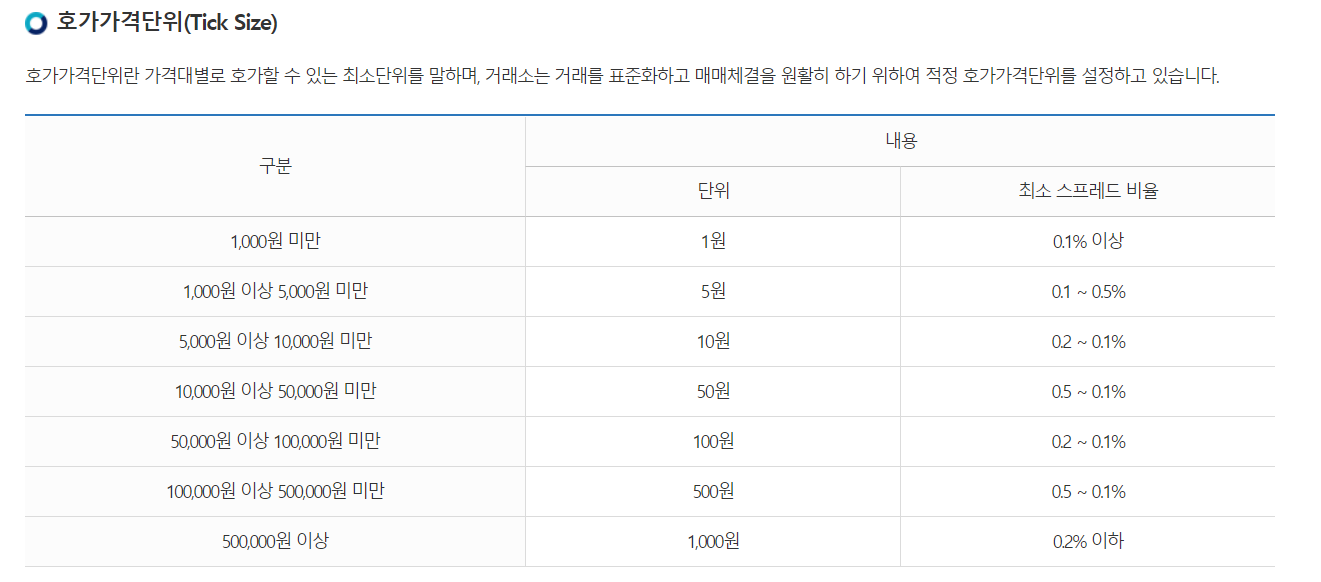

In [72]:
print('출처_한국거래소 홈페이지\n')
Image('호가가격단위자료.png')

### 2.2.1 HS역선택 비용/호가단위

- 유효스프레드에서 실현스프레드를 차감한 값으로, 시장참여자 사이의 정보 비대칭에 기인하기에 스프레드 구성에 있어 중요한 요소로 작용 

In [14]:
df_호가=df_일별시세정보[['종목코드','종목명','거래일자','시가']]
df_호가['호가단위']=""
df_호가['호가단위']=[1000  if (df_호가['시가'][i] >= 500000) 
                       else 500 if (df_호가['시가'][i] >= 100000) 
                       else 100 if (df_호가['시가'][i] >= 50000)
                       else 50 if (df_호가['시가'][i] >= 10000) 
                       else 10 if (df_호가['시가'][i] >= 5000) 
                       else 5 if (df_호가['시가'][i] >= 1000)
                       else 1 for i in range(len(df_호가))]
df_호가=df_호가[['종목코드','거래일자','호가단위']]

df_HS역선택비용=pd.merge(df_일중시세정보,df_호가,on=['종목코드','거래일자'],how='inner')
df_HS역선택비용['HS역선택비용/호가단위'] = df_HS역선택비용['HS역선택비용'] / df_HS역선택비용['호가단위']
df_HS역선택비용=df_HS역선택비용[['종목코드','거래일자','HS역선택비용/호가단위']]
df_HS역선택비용=np.round(df_HS역선택비용.groupby(['종목코드','거래일자']).sum()/121,4)
df_HS역선택비용.reset_index(inplace=True)

### 2.2.2 평균호가스프레드/호가단위

- 최우선 매수,매도호가의 차이는 매수주문자와 매도주문자 사이의 정보 비대칭을 의미하기에 정보비대칭성을 대표하는 변수로서 잘 작용할 것이라 판단

In [15]:
df_평균호가스프레드=pd.merge(df_일중시세정보,df_호가,on=['종목코드','거래일자'],how='inner')
df_평균호가스프레드['평균호가스프레드/호가단위'] = df_평균호가스프레드['평균호가스프레드'] / df_평균호가스프레드['호가단위']
df_평균호가스프레드=df_평균호가스프레드[['종목코드','거래일자','평균호가스프레드/호가단위']]
df_평균호가스프레드=np.round(df_평균호가스프레드.groupby(['종목코드','거래일자']).sum()/121,4)
df_평균호가스프레드.reset_index(inplace=True)

## 2.3  독립변수 데이터셋 생성

In [16]:
df_all=pd.DataFrame()
df_all=pd.merge(df_거래대금시가총액,df_외국인순매수도금액, on=['종목코드','거래일자'],how='inner')
df_all=pd.merge(df_all,df_외국인체결강도, on=['종목코드','거래일자'],how='inner')
df_all=pd.merge(df_all,df_종목별거래량기준매수매도불균형, on=['종목코드','거래일자'],how='inner')
df_all=pd.merge(df_all,df_일중강도, on=['종목코드','거래일자'],how='inner')
df_all=pd.merge(df_all,df_주문수량기준깊이, on=['종목코드','거래일자'],how='inner')
df_all=pd.merge(df_all,df_HS역선택비용, on=['종목코드','거래일자'],how='inner')
df_all=pd.merge(df_all,df_평균호가스프레드, on=['종목코드','거래일자'],how='inner')
df_final=df_all[['종목코드','거래일자','종목명','거래대금/시가총액(%)','외국인순매수(도)금액','외국인체결강도(%)','종목별거래량기준매수매도불균형','일중강도/거래량','주문수량기준깊이','HS역선택비용/호가단위','평균호가스프레드/호가단위']] 

## 2.4  종속변수 컬럼 추가

In [17]:
df_종가시가상승여부=df_일별시세정보[['거래일자','종목명','종목코드','시가','종가']]
df_종가시가상승여부['종가-시가상승'] = df_종가시가상승여부['종가'] - df_종가시가상승여부['시가']
df_종가시가상승여부['종가-시가상승여부']=[1  if (df_종가시가상승여부['종가-시가상승'][i] > 0) 
                       else 0 for i in range(len(df_종가시가상승여부))] 
df_종가시가상승여부['종가-시가상승여부']=[1  if (df_종가시가상승여부['종가-시가상승'][i] > 0) 
                       else 0 for i in range(len(df_종가시가상승여부))] 
df_종가시가상승여부=df_종가시가상승여부[['종목코드','거래일자','종가-시가상승여부']]

## 2.5  최종데이터셋

In [18]:
df_final=pd.merge(df_final,df_종가시가상승여부,on=['종목코드','거래일자'],how='inner')
df_final

,종목코드,거래일자,종목명,거래대금/시가총액(%),외국인순매수(도)금액,외국인체결강도(%),종목별거래량기준매수매도불균형,일중강도/거래량,주문수량기준깊이,HS역선택비용/호가단위,평균호가스프레드/호가단위,종가-시가상승여부
0,KR7000020008,20200102,동화약품,0.0420,-16431.0,92.6264,0.0295,0.666667,111.3306,0.2336,0.5918,1
1,KR7000020008,20200103,동화약품,0.1487,326133.0,213.8956,0.0548,-0.636364,349.6157,0.4013,1.5931,0
2,KR7000020008,20200106,동화약품,0.1588,113891.0,122.7727,0.0504,-0.411765,231.1364,0.8579,1.2392,0
3,KR7000020008,20200107,동화약품,0.1216,149851.0,157.4826,0.0279,-0.222222,375.6157,1.0103,1.1099,0
4,KR7000020008,20200108,동화약품,0.4425,55090.0,105.6042,0.1060,-0.333333,351.9669,0.5904,1.1907,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152500,KYG5307W1015,20220325,엘브이엠씨홀딩스,0.0546,31415.0,162.2366,0.0430,0.500000,443.8595,0.0460,1.4345,1
152501,KYG5307W1015,20220328,엘브이엠씨홀딩스,0.0873,66243.0,132.3121,0.0616,-0.818182,762.2893,0.6225,1.2776,0
152502,KYG5307W1015,20220329,엘브이엠씨홀딩스,0.1204,369597.0,222.0676,0.1356,0.384615,1482.8388,0.6031,1.2403,1
152503,KYG5307W1015,20220330,엘브이엠씨홀딩스,0.0935,-315370.0,28.0385,0.1015,-1.000000,856.2438,0.4696,1.3760,0


# 3. 전처리

## 3.1 우선주 및 특수목적회사 제거

In [19]:
df_final=df_final[df_final['종목명'].str.endswith('우')==False] 
df_final=df_final[df_final['종목명'].str.endswith('우B')==False] 
df_final=df_final[df_final['종목명'].str.endswith('1우B')==False] 
df_final=df_final[df_final['종목명'].str.endswith('2우B')==False] 
df_final=df_final[df_final['종목명'].str.endswith('3우B')==False] 
df_final=df_final[df_final['종목명'].str.endswith('우(전환)')==False] 
df_final=df_final[df_final['종목명'].str.endswith('1호')==False] 
df_final=df_final[df_final['종목명'].str.endswith('2호')==False] 
df_final=df_final[df_final['종목명'].str.endswith('3호')==False] 
df_final=df_final[df_final['종목명'].str.endswith('8호')==False] 
df_final=df_final[df_final['종목명'].str.endswith('12호')==False] 
df_final=df_final[df_final['종목명'].str.endswith('13호')==False] 
df_final=df_final[df_final['종목명'].str.endswith('19호')==False] 

df_final

,종목코드,거래일자,종목명,거래대금/시가총액(%),외국인순매수(도)금액,외국인체결강도(%),종목별거래량기준매수매도불균형,일중강도/거래량,주문수량기준깊이,HS역선택비용/호가단위,평균호가스프레드/호가단위,종가-시가상승여부
0,KR7000020008,20200102,동화약품,0.0420,-16431.0,92.6264,0.0295,0.666667,111.3306,0.2336,0.5918,1
1,KR7000020008,20200103,동화약품,0.1487,326133.0,213.8956,0.0548,-0.636364,349.6157,0.4013,1.5931,0
2,KR7000020008,20200106,동화약품,0.1588,113891.0,122.7727,0.0504,-0.411765,231.1364,0.8579,1.2392,0
3,KR7000020008,20200107,동화약품,0.1216,149851.0,157.4826,0.0279,-0.222222,375.6157,1.0103,1.1099,0
4,KR7000020008,20200108,동화약품,0.4425,55090.0,105.6042,0.1060,-0.333333,351.9669,0.5904,1.1907,0
...,...,...,...,...,...,...,...,...,...,...,...,...
152500,KYG5307W1015,20220325,엘브이엠씨홀딩스,0.0546,31415.0,162.2366,0.0430,0.500000,443.8595,0.0460,1.4345,1
152501,KYG5307W1015,20220328,엘브이엠씨홀딩스,0.0873,66243.0,132.3121,0.0616,-0.818182,762.2893,0.6225,1.2776,0
152502,KYG5307W1015,20220329,엘브이엠씨홀딩스,0.1204,369597.0,222.0676,0.1356,0.384615,1482.8388,0.6031,1.2403,1
152503,KYG5307W1015,20220330,엘브이엠씨홀딩스,0.0935,-315370.0,28.0385,0.1015,-1.000000,856.2438,0.4696,1.3760,0


## 3.2 결측치 및 inf값 확인과 처리

In [20]:
df_final.set_index(['거래일자','종목코드','종목명'],inplace=True)

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 138899 entries, (20200102, 'KR7000020008', '동화약품') to (20220331, 'KYG5307W1015', '엘브이엠씨홀딩스')
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   거래대금/시가총액(%)     138899 non-null  float64
 1   외국인순매수(도)금액      138899 non-null  float64
 2   외국인체결강도(%)       138899 non-null  float64
 3   종목별거래량기준매수매도불균형  138899 non-null  float64
 4   일중강도/거래량         138877 non-null  float64
 5   주문수량기준깊이         138899 non-null  float64
 6   HS역선택비용/호가단위     138899 non-null  float64
 7   평균호가스프레드/호가단위    138899 non-null  float64
 8   종가-시가상승여부        138899 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 10.4+ MB


결측치 확인

In [22]:
df_final.isnull().sum()

거래대금/시가총액(%)        0
외국인순매수(도)금액         0
외국인체결강도(%)          0
종목별거래량기준매수매도불균형     0
일중강도/거래량           22
주문수량기준깊이            0
HS역선택비용/호가단위        0
평균호가스프레드/호가단위       0
종가-시가상승여부           0
dtype: int64

inf값 확인

In [23]:
np.isinf(abs(df_final)).sum()

거래대금/시가총액(%)          0
외국인순매수(도)금액           0
외국인체결강도(%)         1530
종목별거래량기준매수매도불균형       0
일중강도/거래량              0
주문수량기준깊이              0
HS역선택비용/호가단위          0
평균호가스프레드/호가단위         0
종가-시가상승여부             0
dtype: int64

In [24]:
inf_df = df_final[np.isinf(df_final['외국인체결강도(%)'])]
inf_df.head(5)

,,,거래대금/시가총액(%),외국인순매수(도)금액,외국인체결강도(%),종목별거래량기준매수매도불균형,일중강도/거래량,주문수량기준깊이,HS역선택비용/호가단위,평균호가스프레드/호가단위,종가-시가상승여부
거래일자,종목코드,종목명,,,,,,,,,
20200205,KR7000050005,경방,0.0320,28117.0,inf,0.0199,0.454545,181.2273,0.1584,0.5181,1
20200206,KR7000050005,경방,0.0327,163456.0,inf,0.0348,0.866667,101.4132,0.5986,0.6238,1
20200213,KR7000050005,경방,0.0041,5712.0,inf,0.0000,-1.000000,16.9050,0.2309,0.6081,1
20210324,KR7000050005,경방,0.0065,428.0,inf,0.0110,0.000000,278.0331,0.0483,0.4418,1
20220112,KR7000050005,경방,0.0146,29841.0,inf,0.0214,1.000000,145.4793,0.1019,0.4044,1


inf 및 null값 제거

In [25]:
df_final = df_final.replace([np.inf, -np.inf], np.nan).dropna()
df_final

,,,거래대금/시가총액(%),외국인순매수(도)금액,외국인체결강도(%),종목별거래량기준매수매도불균형,일중강도/거래량,주문수량기준깊이,HS역선택비용/호가단위,평균호가스프레드/호가단위,종가-시가상승여부
거래일자,종목코드,종목명,,,,,,,,,
20200102,KR7000020008,동화약품,0.0420,-16431.0,92.6264,0.0295,0.666667,111.3306,0.2336,0.5918,1
20200103,KR7000020008,동화약품,0.1487,326133.0,213.8956,0.0548,-0.636364,349.6157,0.4013,1.5931,0
20200106,KR7000020008,동화약품,0.1588,113891.0,122.7727,0.0504,-0.411765,231.1364,0.8579,1.2392,0
20200107,KR7000020008,동화약품,0.1216,149851.0,157.4826,0.0279,-0.222222,375.6157,1.0103,1.1099,0
20200108,KR7000020008,동화약품,0.4425,55090.0,105.6042,0.1060,-0.333333,351.9669,0.5904,1.1907,0
...,...,...,...,...,...,...,...,...,...,...,...
20220325,KYG5307W1015,엘브이엠씨홀딩스,0.0546,31415.0,162.2366,0.0430,0.500000,443.8595,0.0460,1.4345,1
20220328,KYG5307W1015,엘브이엠씨홀딩스,0.0873,66243.0,132.3121,0.0616,-0.818182,762.2893,0.6225,1.2776,0
20220329,KYG5307W1015,엘브이엠씨홀딩스,0.1204,369597.0,222.0676,0.1356,0.384615,1482.8388,0.6031,1.2403,1


결측치와 inf값이 잘 제거된 것을 확인할 수 있습니다.

## 3.3 기초통계량 확인 및 EDA(데이터 탐색)

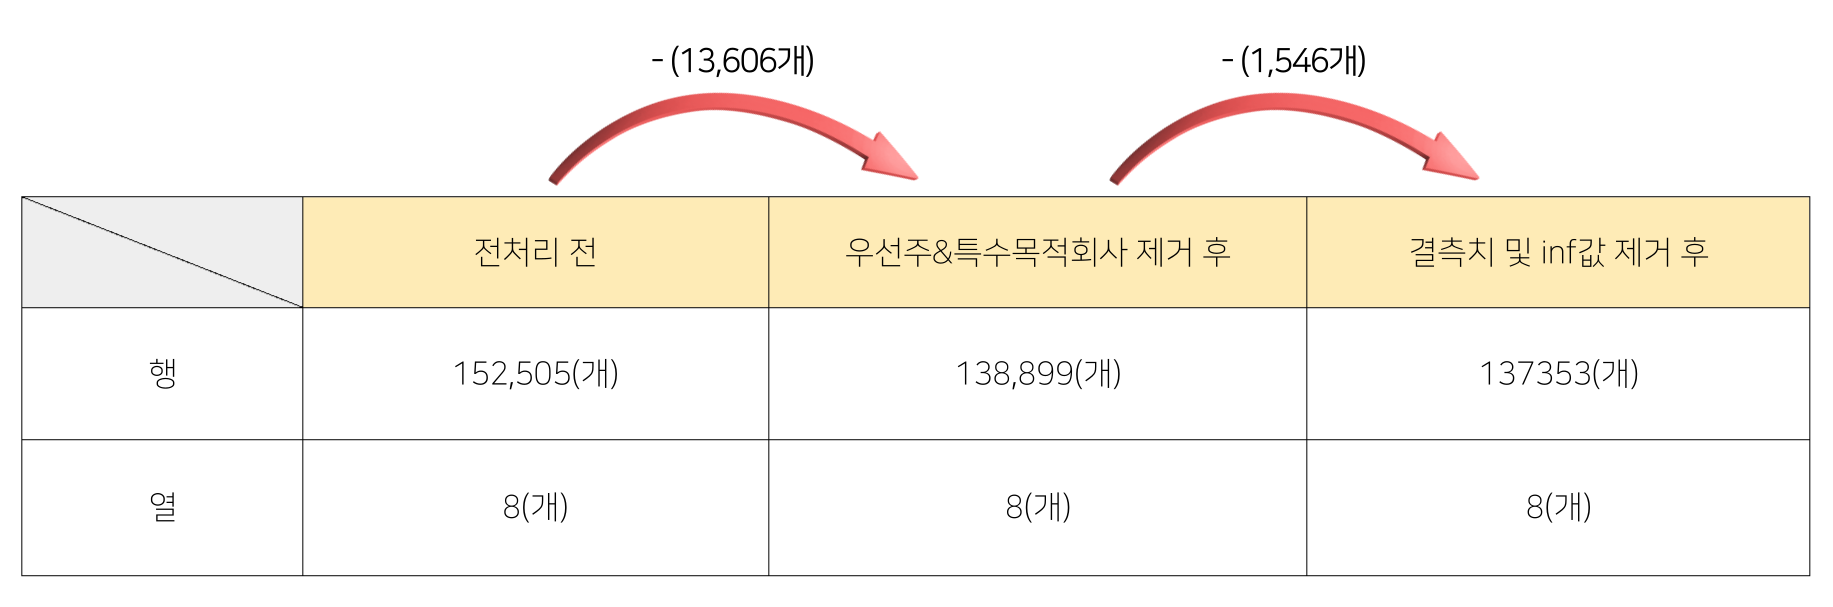

In [83]:
Image('데이터개수.png')

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 137353 entries, (20200102, 'KR7000020008', '동화약품') to (20220331, 'KYG5307W1015', '엘브이엠씨홀딩스')
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   거래대금/시가총액(%)     137353 non-null  float64
 1   외국인순매수(도)금액      137353 non-null  float64
 2   외국인체결강도(%)       137353 non-null  float64
 3   종목별거래량기준매수매도불균형  137353 non-null  float64
 4   일중강도/거래량         137353 non-null  float64
 5   주문수량기준깊이         137353 non-null  float64
 6   HS역선택비용/호가단위     137353 non-null  float64
 7   평균호가스프레드/호가단위    137353 non-null  float64
 8   종가-시가상승여부        137353 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 10.3+ MB


In [27]:
df_final.describe()

,거래대금/시가총액(%),외국인순매수(도)금액,외국인체결강도(%),종목별거래량기준매수매도불균형,일중강도/거래량,주문수량기준깊이,HS역선택비용/호가단위,평균호가스프레드/호가단위,종가-시가상승여부
count,137353.000000,1.373530e+05,1.373530e+05,137353.000000,137353.000000,1.373530e+05,137353.000000,137353.000000,137353.000000
mean,0.915080,-1.144872e+06,3.797103e+02,0.232647,-0.105162,3.624276e+03,1.051894,1.051349,0.444519
std,4.491436,5.367597e+07,1.008620e+04,0.165005,0.574997,3.605972e+04,19.452301,10.113135,0.496914
min,0.000100,-9.867865e+09,0.000000e+00,0.000000,-1.000000,0.000000e+00,-4.667000,-933.370300,0.000000
25%,0.076200,-6.547030e+05,4.372540e+01,0.080700,-0.600000,2.076529e+02,0.270800,1.002900,0.000000
50%,0.185800,-2.514000e+04,8.764080e+01,0.214800,-0.142857,6.482479e+02,0.488400,1.098000,0.000000
75%,0.477400,3.625790e+05,1.660758e+02,0.366800,0.333333,1.887831e+03,0.828500,1.387800,1.000000
max,232.102700,3.068131e+09,2.164600e+06,0.854800,1.000000,6.483906e+06,1850.548600,412.827300,1.000000


거래대금/시가총액(%)의 # 왜도 : 15.41  # 첨도 : 341.61
외국인순매수(도)금액의 # 왜도 : -55.01  # 첨도 : 9087.12
외국인체결강도(%)의 # 왜도 : 126.3  # 첨도 : 21158.79
종목별거래량기준매수매도불균형의 # 왜도 : 0.37  # 첨도 : -0.92
일중강도/거래량의 # 왜도 : 0.21  # 첨도 : -1.04
주문수량기준깊이의 # 왜도 : 81.81  # 첨도 : 10804.88
HS역선택비용/호가단위의 # 왜도 : 62.94  # 첨도 : 4519.79
평균호가스프레드/호가단위의 # 왜도 : -58.85  # 첨도 : 4160.67


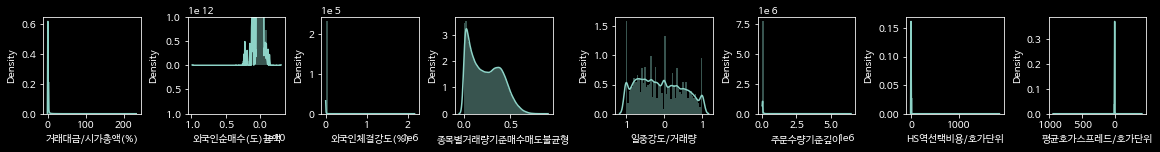

In [33]:
plt.rcParams["figure.figsize"] = (16,2)
fig, axes = plt.subplots(1,8, constrained_layout=True)

for i in range(0,8,1):
    sns.distplot(df_final.iloc[:,i], ax = axes[i])
    print(f'{df_final.columns[i]}의 # 왜도 : {np.round(skew(df_final.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(df_final.iloc[:,i]),2)}')
plt.show()

이상치 확인

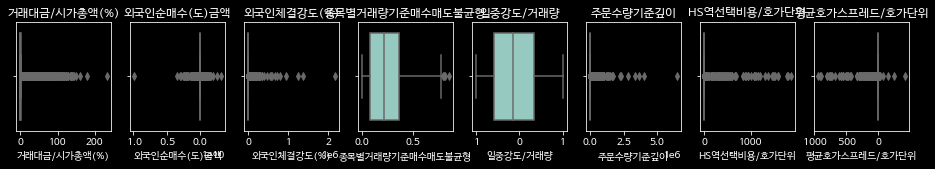

In [46]:
plt.rcParams["figure.figsize"] = (16,2)
fig, axes = plt.subplots(1,8)

for i in range(0,8,1):
    sns.boxplot(df_final.iloc[:,i], ax = axes[i])
    axes[i].set_title(df_final.columns[i])
plt.show()

이상치 처리 - 윈저화

In [ ]:
win_df = []
for i in range(len(df_final.columns)):
  dt = winsorize(df_final.iloc[:,i], limits=[0.005, 0.005])
  win_df.append(np.ma.getdata(dt))

df_final_win = pd.DataFrame(data=win_df, index=df_final.columns, columns=df_final.index).transpose()

In [48]:
df_final_win.describe()

,거래대금/시가총액(%),외국인순매수(도)금액,외국인체결강도(%),종목별거래량기준매수매도불균형,일중강도/거래량,주문수량기준깊이,HS역선택비용/호가단위,평균호가스프레드/호가단위,종가-시가상승여부
count,137353.000000,1.373530e+05,137353.000000,137353.000000,137353.000000,137353.000000,137353.000000,137353.000000,137353.000000
mean,0.792613,-7.290885e+05,190.107448,0.232473,-0.105162,2723.881381,0.645816,1.252843,0.444519
std,2.704122,1.397975e+07,477.831655,0.164541,0.574997,8879.037496,0.588720,0.619259,0.496914
min,0.003400,-1.118773e+08,0.000000,0.000100,-1.000000,1.578500,-0.133300,0.154900,0.000000
25%,0.076200,-6.547030e+05,43.725400,0.080700,-0.600000,207.652900,0.270800,1.002900,0.000000
50%,0.185800,-2.514000e+04,87.640800,0.214800,-0.142857,648.247900,0.488400,1.098000,0.000000
75%,0.477400,3.625790e+05,166.075800,0.366800,0.333333,1887.830600,0.828500,1.387800,1.000000
max,27.905900,8.482298e+07,5195.744700,0.637700,1.000000,95975.595000,3.883800,4.873700,1.000000


거래대금/시가총액(%)의 # 왜도 : 7.6  # 첨도 : 65.35
외국인순매수(도)금액의 # 왜도 : -2.07  # 첨도 : 33.96
외국인체결강도(%)의 # 왜도 : 7.88  # 첨도 : 72.11
종목별거래량기준매수매도불균형의 # 왜도 : 0.35  # 첨도 : -0.97
일중강도/거래량의 # 왜도 : 0.21  # 첨도 : -1.04
주문수량기준깊이의 # 왜도 : 8.03  # 첨도 : 74.28
HS역선택비용/호가단위의 # 왜도 : 2.31  # 첨도 : 7.52
평균호가스프레드/호가단위의 # 왜도 : 2.46  # 첨도 : 9.54


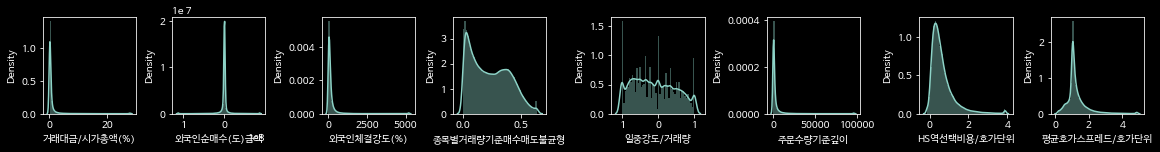

In [49]:
plt.rcParams["figure.figsize"] = (16,2)
fig, axes = plt.subplots(1,8, constrained_layout=True)

for i in range(0,8,1):
    sns.distplot(df_final_win.iloc[:,i], ax = axes[i])
    print(f'{df_final_win.columns[i]}의 # 왜도 : {np.round(skew(df_final_win.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(df_final_win.iloc[:,i]),2)}')
plt.show()

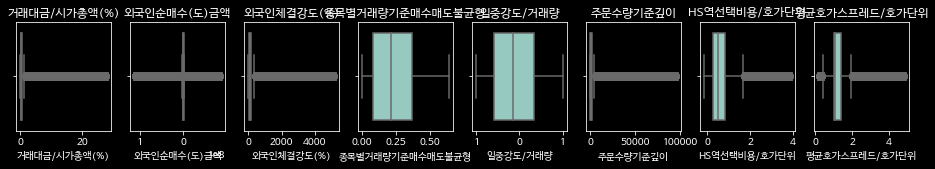

In [50]:
plt.rcParams["figure.figsize"] = (16,2)
fig, axes = plt.subplots(1,8)

for i in range(0,8,1):
    sns.boxplot(df_final_win.iloc[:,i], ax = axes[i])
    axes[i].set_title(df_final_win.columns[i])
plt.show()

In [53]:
corr_df = df_final_win.drop('종가-시가상승여부',axis=1).corr()
corr_df

,거래대금/시가총액(%),외국인순매수(도)금액,외국인체결강도(%),종목별거래량기준매수매도불균형,일중강도/거래량,주문수량기준깊이,HS역선택비용/호가단위,평균호가스프레드/호가단위
거래대금/시가총액(%),1.000000,-0.040704,-0.041885,0.235852,0.006516,0.169585,0.175135,0.013180
외국인순매수(도)금액,-0.040704,1.000000,0.078846,-0.028905,0.140025,-0.060128,0.005987,0.023773
외국인체결강도(%),-0.041885,0.078846,1.000000,-0.103346,0.137277,-0.006782,-0.036420,-0.028562
종목별거래량기준매수매도불균형,0.235852,-0.028905,-0.103346,1.000000,0.120570,0.218743,0.140015,0.037120
일중강도/거래량,0.006516,0.140025,0.137277,0.120570,1.000000,0.009422,0.029925,0.017565
주문수량기준깊이,0.169585,-0.060128,-0.006782,0.218743,0.009422,1.000000,-0.063190,-0.080389
HS역선택비용/호가단위,0.175135,0.005987,-0.036420,0.140015,0.029925,-0.063190,1.000000,0.589762
평균호가스프레드/호가단위,0.013180,0.023773,-0.028562,0.037120,0.017565,-0.080389,0.589762,1.000000


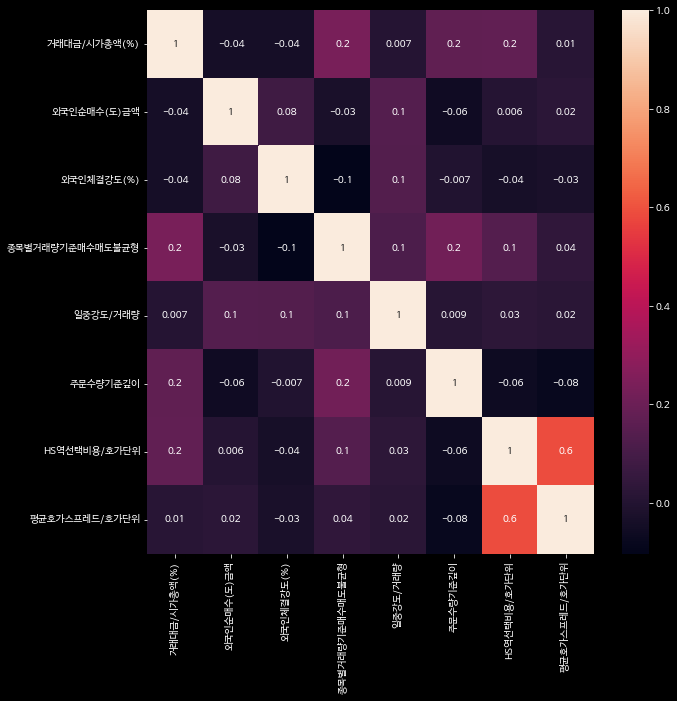

In [54]:
# 히트맵으로 시각화
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

# 4. 모델링

## 4.1 독립/종속변수 분리

In [57]:
# features(설명변수), target(종속변수) 분리
target = df_final['종가-시가상승여부']
features = df_final.drop(['종가-시가상승여부'], axis=1)

In [58]:
df_final['종가-시가상승여부'].value_counts()

0    76297
1    61056
Name: 종가-시가상승여부, dtype: int64

종속변수인 '종가-시가상승여부' 컬럼의 비율을 통해 **데이터의 불균형이 없음**을 확인할 수 있습니다.

## 4.1 변수선택

로짓 t 검정

In [60]:
# statsmodels의 logit 분석을 위해 X 변수 생성
X = features.reset_index(drop=True)
y = target.reset_index(drop=True)

# y 변수 배열 조정
y = np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(137353, 8)
(137353, 1)


In [61]:
X = sm.add_constant(X)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               137353
Model:                            GLM   Df Residuals:                   137344
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -76403.
Date:                Fri, 22 Jul 2022   Deviance:                   1.5281e+05
Time:                        10:45:28   Pearson chi2:                 3.42e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3404      0.014    -

모든 후보변수가 95% 신뢰수준 내에서 유의함을 확인하였습니다.

## 4.2 train-test split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=8)

## 4.3 머신러닝

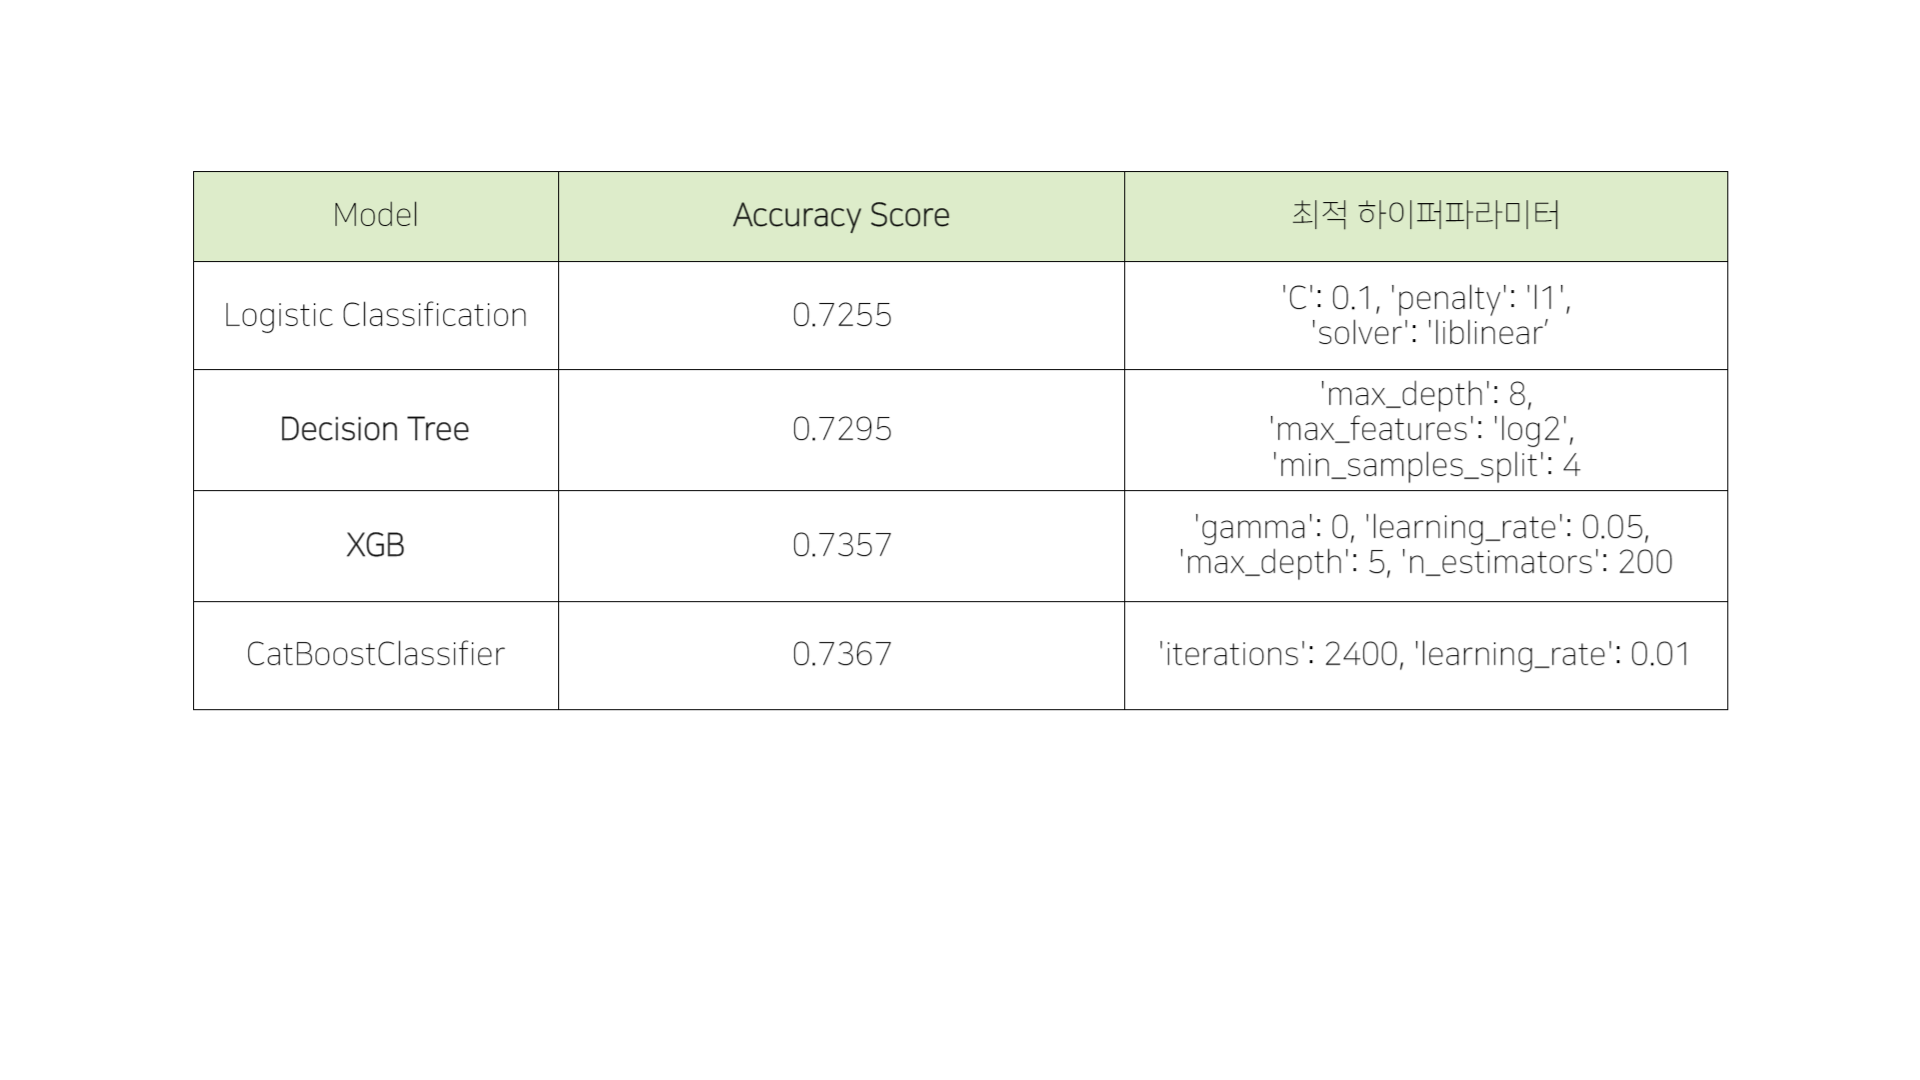

In [81]:
Image('모델링성능.png')

위의 표를 통해 다양한 모델 중 'CatBoostClassifier'의 모델 성능이 가장 우수함을 확인할 수 있었습니다.

### 4.3.1 Catboost모델

Catboost모델을 사용한 학습과 검증 및 GridsearchCV를 통한 최적 파라미터 선정

In [69]:
cat_param_grid = {
    'iterations': [1000, 1600, 2000, 2400],
    'learning_rate': [0.1,0.01, 0.03, 0.05]
}

In [70]:
cat_classifier= CatBoostClassifier(verbose=False)

clf1 = GridSearchCV(cat_classifier, param_grid=cat_param_grid,
                    scoring='accuracy', n_jobs=-1, cv=3)

clf2 = GridSearchCV(cat_classifier, param_grid=cat_param_grid,
                    scoring='f1', n_jobs=-1, cv=3)

clf1.fit(X_train, y_train.values.ravel())
clf2.fit(X_train, y_train.values.ravel())

print(f'최적 하이퍼 파라미터 : {clf1.best_params_}, 최적 평균 정확도 : {np.round(clf1.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {clf2.best_params_}, 최적 평균 F1스코어 : {np.round(clf2.best_score_,4)}')

최적 하이퍼 파라미터 : {'iterations': 2400, 'learning_rate': 0.01}, 최적 평균 정확도 : 0.7366
최적 하이퍼 파라미터 : {'iterations': 1600, 'learning_rate': 0.01}, 최적 평균 F1스코어 : 0.6923


In [66]:
cat= CatBoostClassifier(verbose=False, iterations= 2400, learning_rate= 0.01, random_state= 8)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [75]:
print('### CatBoostClassifier 분류 결과 ###')
print(f'ACC : {acc_score:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')

### CatBoostClassifier 분류 결과 ###
ACC : 0.7367
Precision : 0.7198
Recall : 0.6651
F1 Score : 0.6914


설명변수 중요도는 다음과 같습니다.

일중강도/거래량           37.854310
외국인체결강도(%)         11.435109
외국인순매수(도)금액        10.249730
종목별거래량기준매수매도불균형    10.011388
HS역선택비용/호가단위        9.281042
거래대금/시가총액(%)        9.002037
주문수량기준깊이            6.349963
평균호가스프레드/호가단위       5.816421
dtype: float64


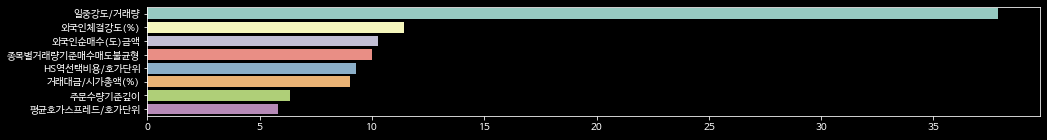

In [76]:
feature_series = pd.Series(data = cat.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series)